In [1]:
import pandas as pd
import sqlite3
import numpy as np
from matplotlib import colors, cm, pyplot as plt

In [2]:
sequences_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/MSstats - YUPS-R.csv', sep=',')

In [3]:
sequences_df.head()

,ProteinName,PeptideSequence,PrecursorCharge,FragmentIon,ProductCharge,IsotopeLabelType,Condition,BioReplicate,Run,Intensity
0,O76070ups|SYUG_HUMAN_UPS,n[42.0106]GSSHHHHHHSSGLVPR,2,NaN,NaN,L,YUPS-R,0,YeastPlusUPS1_01_Slot1-1_1_3663,7853.4404
1,O76070ups|SYUG_HUMAN_UPS,n[42.0106]GSSHHHHHHSSGLVPR,2,NaN,NaN,L,YUPS-R,0,YeastPlusUPS1_02_Slot1-1_1_3664,NaN
2,O76070ups|SYUG_HUMAN_UPS,n[42.0106]GSSHHHHHHSSGLVPR,2,NaN,NaN,L,YUPS-R,0,YeastPlusUPS1_03_Slot1-1_1_3665,NaN
3,O76070ups|SYUG_HUMAN_UPS,n[42.0106]GSSHHHHHHSSGLVPR,2,NaN,NaN,L,YUPS-R,0,YeastPlusUPS1_04_Slot1-1_1_3666,NaN
4,O76070ups|SYUG_HUMAN_UPS,n[42.0106]GSSHHHHHHSSGLVPR,2,NaN,NaN,L,YUPS-R,0,YeastPlusUPS1_05_Slot1-1_1_3667,NaN


In [4]:
sequences_df.columns

Index(['ProteinName', 'PeptideSequence', 'PrecursorCharge', 'FragmentIon',
       'ProductCharge', 'IsotopeLabelType', 'Condition', 'BioReplicate', 'Run',
       'Intensity'],
      dtype='object')

In [5]:
sequences_df = sequences_df[sequences_df.Intensity > 0]

In [6]:
len(sequences_df.drop_duplicates(subset=['PeptideSequence', 'PrecursorCharge'], keep='first', inplace=False))

19688

In [7]:
sequences_df['group'] = sequences_df.Run.apply(lambda x: x.split('_')[0])

In [8]:
sequences_df.group.unique()

array(['YeastPlusUPS1', 'YeastPlusUPS2'], dtype=object)

#### analyse the UPS1 runs

In [9]:
ups1_only_df = sequences_df[(sequences_df.group == 'YeastPlusUPS1')]

In [10]:
# count how many runs each sequence/charge was extracted from
sequence_occurences_l = []
for group_name,group_df in ups1_only_df.groupby(['PeptideSequence','PrecursorCharge'], as_index=False):
    sequence_occurences_l.append((group_name[0], group_name[1], len(group_df.Run.unique())))
ups1_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence','charge','number_of_runs_extracted'])

In [11]:
number_of_ups1_runs_in_experiment = len(ups1_only_df.Run.unique())
print('there are {} Y+UPS1 runs in the experiment'.format(number_of_ups1_runs_in_experiment))

there are 10 Y+UPS1 runs in the experiment


In [12]:
# display the number of missing values across the experiment
ups1_sequence_occurences_df['missing_files'] = number_of_ups1_runs_in_experiment - ups1_sequence_occurences_df.number_of_runs_extracted
proportion_of_missing_extractions = ups1_sequence_occurences_df.missing_files.sum() / (len(ups1_sequence_occurences_df) * number_of_ups1_runs_in_experiment)
print("{}% of values missing across the UPS1 runs.".format(round(proportion_of_missing_extractions*100)))

24.0% of values missing across the UPS1 runs.


In [13]:
modified_sequences_count = len(ups1_only_df.PeptideSequence.unique())
modified_sequences_count

15673

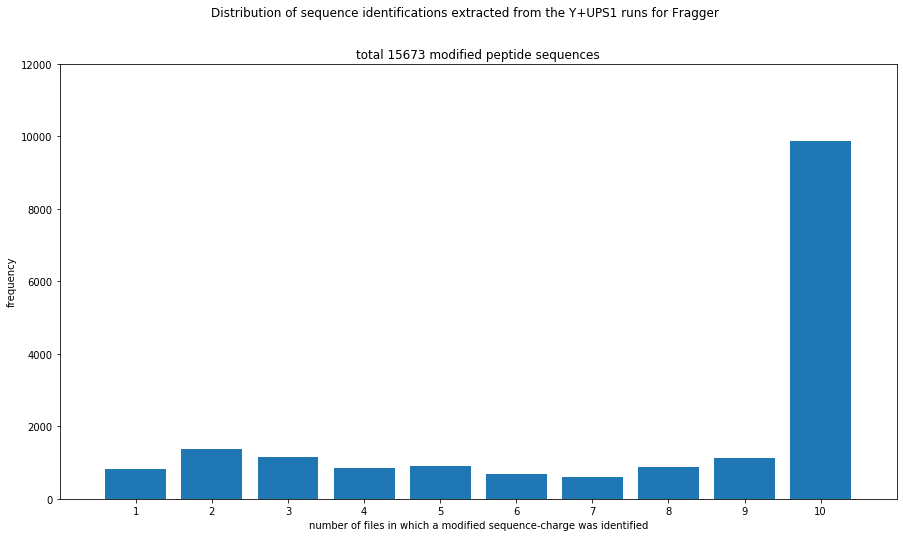

In [14]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications extracted from the Y+UPS1 runs for Fragger')
plt.title('total {} modified peptide sequences'.format(modified_sequences_count))

counts = np.bincount(ups1_sequence_occurences_df.number_of_runs_extracted)
ax1.bar(range(11), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,11), xlim=[0, 11])
plt.ylim((0,12000))

plt.show()

#### analyse the UPS2 runs

In [15]:
ups2_only_df = sequences_df[(sequences_df.group == 'YeastPlusUPS2')]

In [16]:
# count how many runs each sequence/charge was extracted from
sequence_occurences_l = []
for group_name,group_df in ups2_only_df.groupby(['PeptideSequence','PrecursorCharge'], as_index=False):
    sequence_occurences_l.append((group_name[0], group_name[1], len(group_df.Run.unique())))
ups2_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence','charge','number_of_runs_extracted'])

In [17]:
number_of_ups2_runs_in_experiment = len(ups2_only_df.Run.unique())
print('there are {} Y+UPS2 runs in the experiment'.format(number_of_ups2_runs_in_experiment))

there are 10 Y+UPS2 runs in the experiment


In [18]:
# display the number of missing values across the experiment
ups2_sequence_occurences_df['missing_files'] = number_of_ups2_runs_in_experiment - ups2_sequence_occurences_df.number_of_runs_extracted
proportion_of_missing_extractions = ups2_sequence_occurences_df.missing_files.sum() / (len(ups2_sequence_occurences_df) * number_of_ups2_runs_in_experiment)
print("{}% of values missing across the UPS2 runs.".format(round(proportion_of_missing_extractions*100)))

26.0% of values missing across the UPS2 runs.


In [19]:
modified_sequences_count = len(ups2_only_df.PeptideSequence.unique())
modified_sequences_count

15316

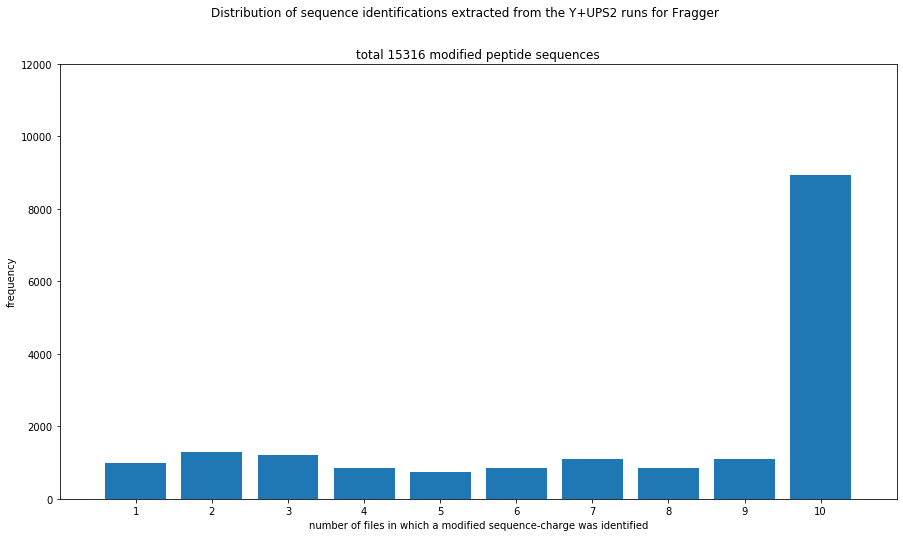

In [20]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications extracted from the Y+UPS2 runs for Fragger')
plt.title('total {} modified peptide sequences'.format(modified_sequences_count))

counts = np.bincount(ups2_sequence_occurences_df.number_of_runs_extracted)
ax1.bar(range(11), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,11), xlim=[0, 11])
plt.ylim((0,12000))

plt.show()